Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  l

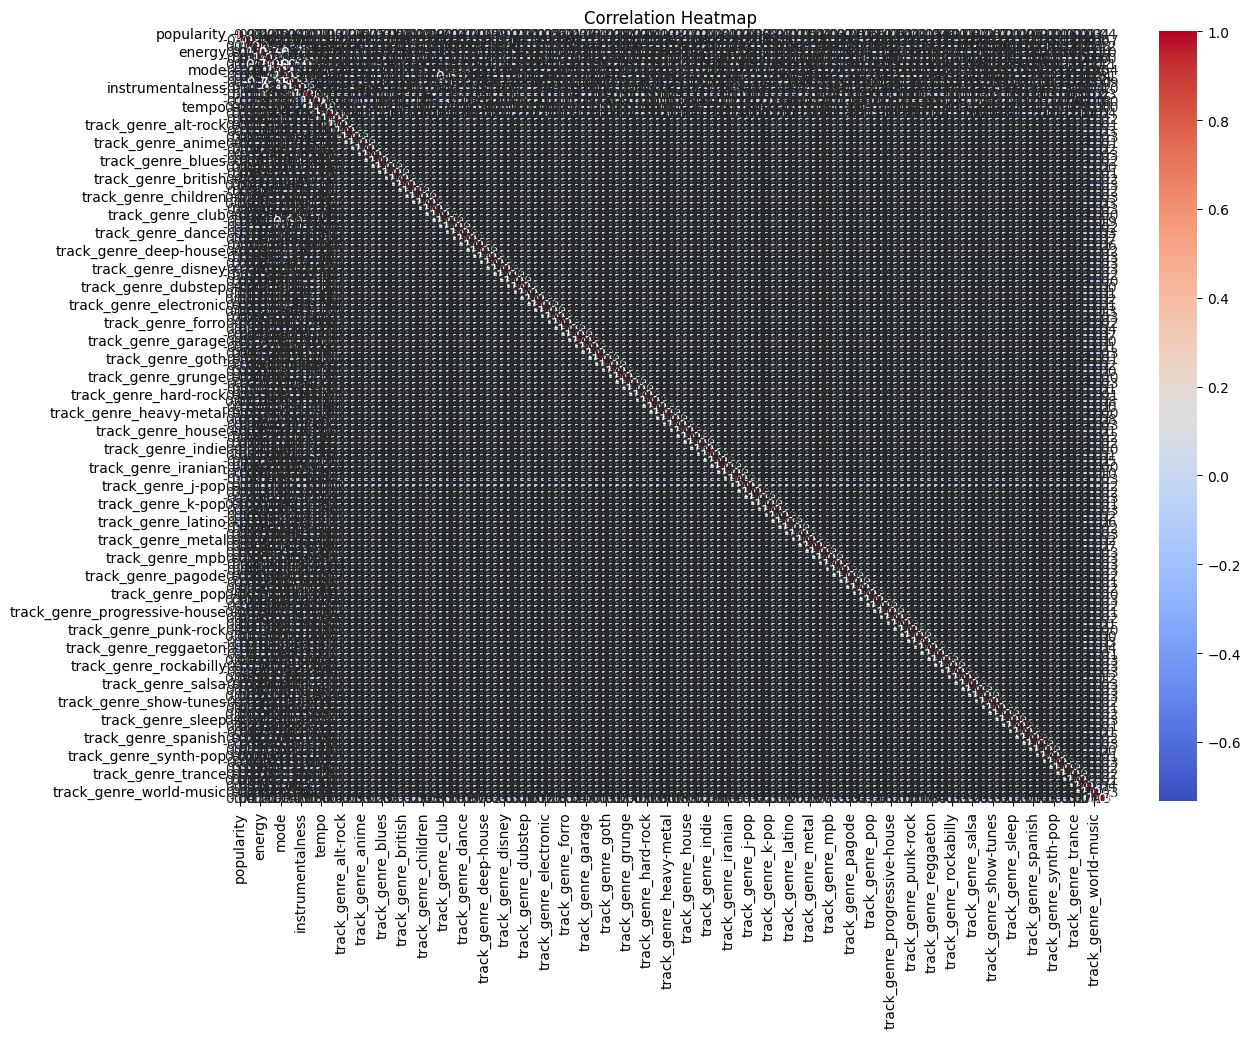

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


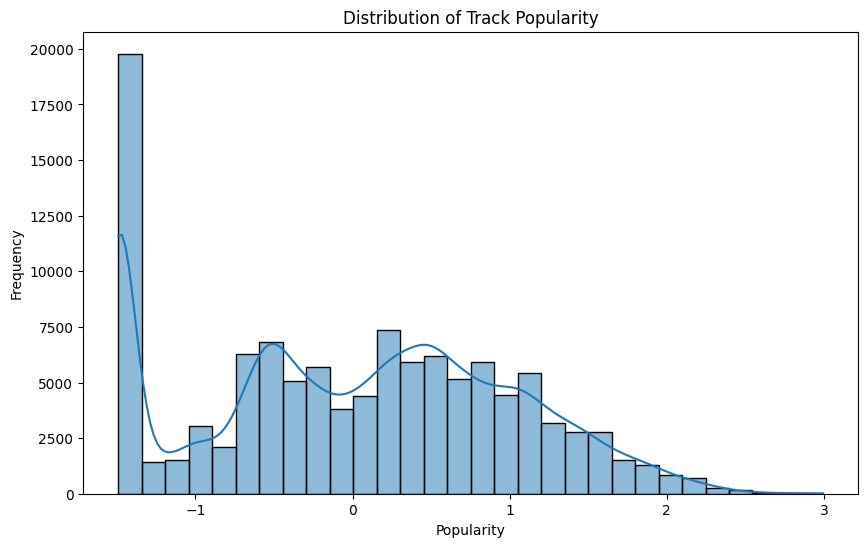


Final DataFrame ready for modeling:
   popularity  duration_ms  danceability    energy       key  loudness  \
0    1.782627     0.024575      0.629244 -0.717148 -1.210442  0.300828   
1    0.975633    -0.730859     -0.845908 -1.889980 -1.210442 -1.784744   
2    1.065299    -0.160332     -0.742186 -1.122669 -1.491343 -0.293288   
3    1.692961    -0.243214     -1.733304 -2.312994 -1.491343 -2.039252   
4    2.186125    -0.271919      0.295030 -0.788711 -0.929541 -0.282750   

       mode  speechiness  acousticness  instrumentalness  ...  \
0 -1.326281     0.551848     -0.850202         -0.504109  ...   
1  0.753988    -0.078993      1.831732         -0.504094  ...   
2  0.753988    -0.273826     -0.315499         -0.504112  ...   
3  0.753988    -0.457309      1.774593         -0.503883  ...   
4  0.753988    -0.303145      0.463399         -0.504112  ...   

   track_genre_study  track_genre_swedish  track_genre_synth-pop  \
0              False                False                  

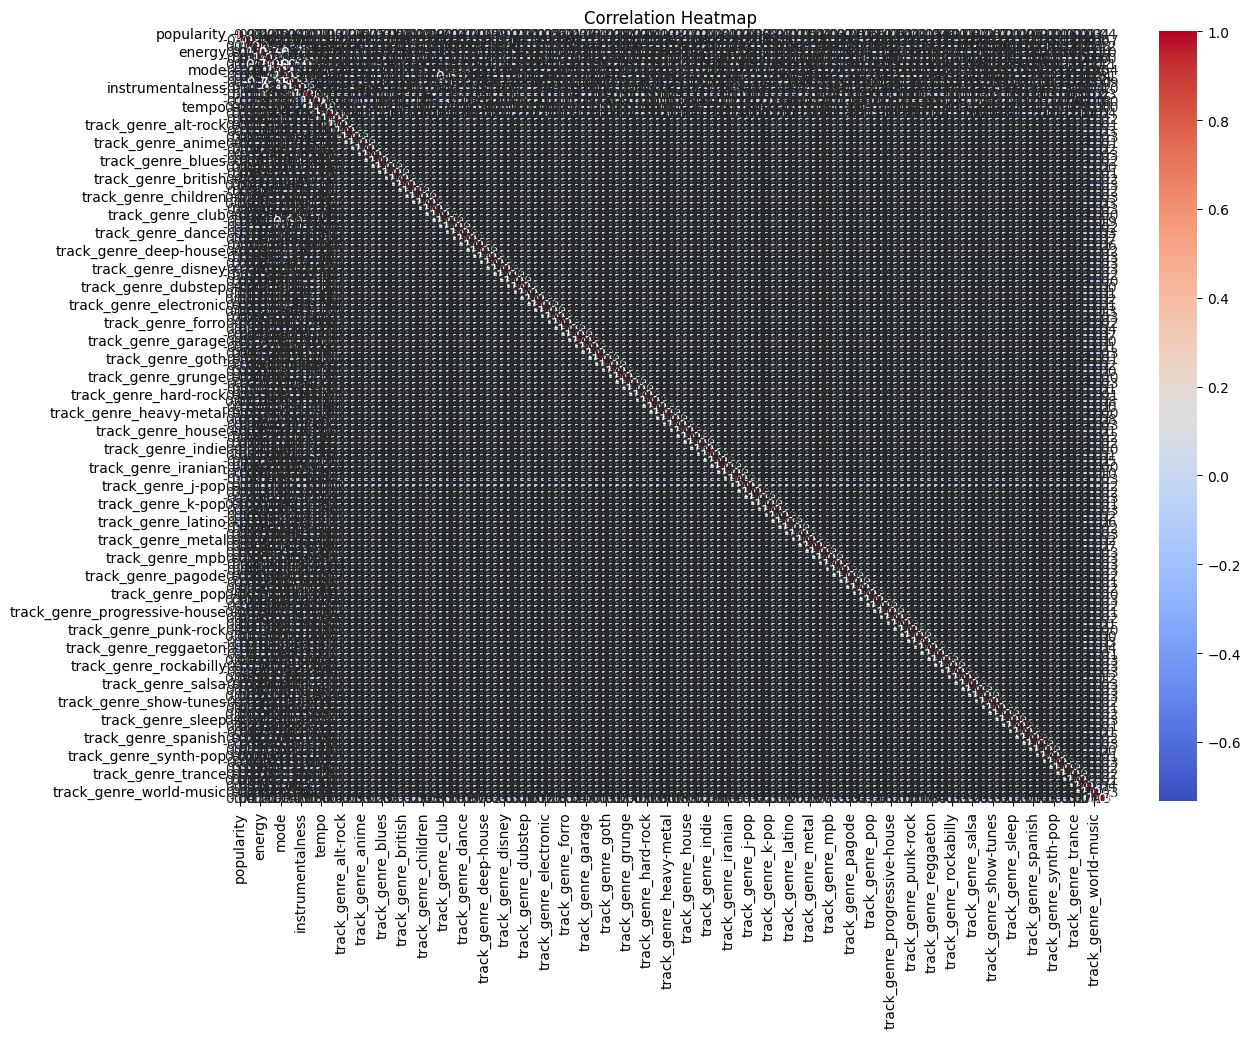

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


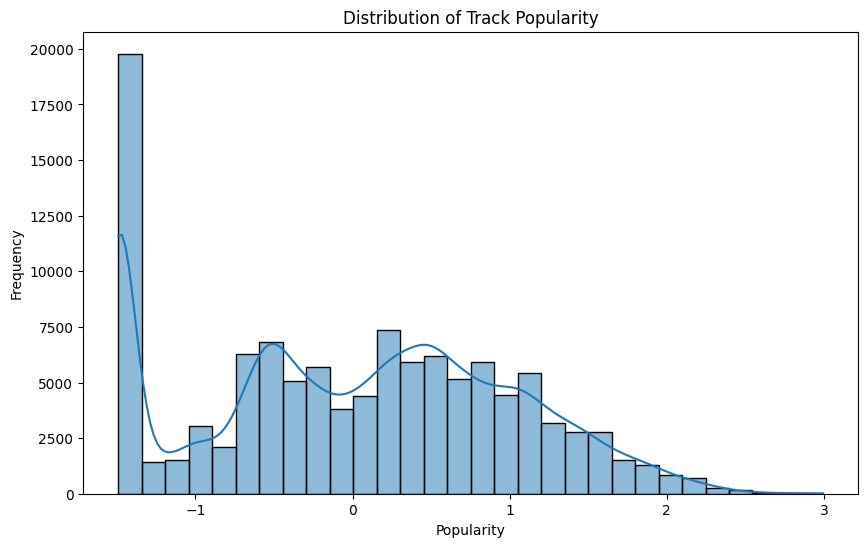


Final DataFrame ready for modeling:
   popularity  duration_ms  danceability    energy       key  loudness  \
0    1.782627     0.024575      0.629244 -0.717148 -1.210442  0.300828   
1    0.975633    -0.730859     -0.845908 -1.889980 -1.210442 -1.784744   
2    1.065299    -0.160332     -0.742186 -1.122669 -1.491343 -0.293288   
3    1.692961    -0.243214     -1.733304 -2.312994 -1.491343 -2.039252   
4    2.186125    -0.271919      0.295030 -0.788711 -0.929541 -0.282750   

       mode  speechiness  acousticness  instrumentalness  ...  \
0 -1.326281     0.551848     -0.850202         -0.504109  ...   
1  0.753988    -0.078993      1.831732         -0.504094  ...   
2  0.753988    -0.273826     -0.315499         -0.504112  ...   
3  0.753988    -0.457309      1.774593         -0.503883  ...   
4  0.753988    -0.303145      0.463399         -0.504112  ...   

   track_genre_study  track_genre_swedish  track_genre_synth-pop  \
0              False                False                  

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
df = pd.read_csv('/kaggle/input/ml-dataset/dataset.csv') 

# Step 1: Inspect the structure of the dataset
print("Dataset Structure:")
print(df.info())

print("\nFirst few rows:")
print(df.head())

# Step 2: Handle Missing Values
# Identify missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Impute missing values in 'artists', 'album_name', and 'track_name' with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df[['artists', 'album_name', 'track_name']] = imputer.fit_transform(df[['artists', 'album_name', 'track_name']])

# Step 3: Data Transformation
# Encoding categorical variables
df = pd.get_dummies(df, columns=['track_genre', 'explicit'], drop_first=True)

# Normalizing/Standardizing numerical variables
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

# Step 4: Exploratory Data Analysis (EDA)
# Drop non-numeric columns before correlation
df_numeric = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'])

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], kde=True, bins=30)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Step 5: Prepare Data for Model Training
# Drop unnecessary columns
df_final = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'])

# Check the final structure of the DataFrame
print("\nFinal DataFrame ready for modeling:")
print(df_final.head())
print(df_final.info())

# Step 1: Inspect the structure of the dataset
print("Dataset Structure:")
print(df.info())

print("\nFirst few rows:")
print(df.head())

# Step 2: Handle Missing Values
# Identify missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Impute missing values in 'artists', 'album_name', and 'track_name' with the most frequent value
imputer = SimpleImputer(strategy='most_frequent')
df[['artists', 'album_name', 'track_name']] = imputer.fit_transform(df[['artists', 'album_name', 'track_name']])

# Step 3: Data Transformation
# Encoding categorical variables
print(df.columns)

if 'track_genre' in df.columns and 'explicit' in df.columns:
    df = pd.get_dummies(df, columns=['track_genre', 'explicit'], drop_first=True)
else:
    print("Columns 'track_genre' or 'explicit' not found in DataFrame.")

# Normalizing/Standardizing numerical variables
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

# Step 4: Exploratory Data Analysis (EDA)
# Drop non-numeric columns before correlation
df_numeric = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'])

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of Popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], kde=True, bins=30)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Step 5: Prepare Data for Model Training
# Drop unnecessary columns
df_final = df.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'])

# Check the final structure of the DataFrame
print("\nFinal DataFrame ready for modeling:")
print(df_final.head())
print(df_final.info())
